In [2]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [4]:
model = VGG16(weights='imagenet', include_top=False)

In [5]:
img_path = 'image_copy/cabbage/cabbage_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [18]:
model.add(Flatten())
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [19]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


In [22]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="image_copy/train", target_size=(224,224))
tsdata = ImageDataGenerator()                        
testdata = tsdata.flow_from_directory(directory="image_copy/test", target_size=(224,224))

Found 5400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [23]:
hist = model.fit_generator(steps_per_epoch=5,generator=traindata,
                           validation_data= testdata, validation_steps=10,epochs=5,callbacks=[checkpoint,early])

Epoch 1/5
5/5 [==============================] - 98s 20s/step - loss: 1.1021 - accuracy: 0.3562 - val_loss: 1.0989 - val_accuracy: 0.3187
Epoch 2/5
5/5 [==============================] - 100s 20s/step - loss: 1.1007 - accuracy: 0.3375 - val_loss: 1.1000 - val_accuracy: 0.3344
Epoch 3/5
5/5 [==============================] - 97s 19s/step - loss: 1.1025 - accuracy: 0.3125 - val_loss: 1.0986 - val_accuracy: 0.3344
Epoch 4/5
5/5 [==============================] - 95s 19s/step - loss: 1.0988 - accuracy: 0.3250 - val_loss: 1.0982 - val_accuracy: 0.3438
Epoch 5/5
5/5 [==============================] - 96s 19s/step - loss: 1.0982 - accuracy: 0.3438 - val_loss: 1.0989 - val_accuracy: 0.3438


{'loss': [1.0874637365341187, 1.1018407344818115, 1.0977966785430908, 1.106642723083496, 1.1006065607070923], 'accuracy': [0.41874998807907104, 0.32499998807907104, 0.38749998807907104, 0.29374998807907104, 0.33125001192092896], 'val_loss': [1.1027562618255615, 1.1015501022338867, 1.0990387201309204, 1.0996320247650146, 1.0987799167633057], 'val_accuracy': [0.328125, 0.34375, 0.3531250059604645, 0.34375, 0.3531250059604645]}


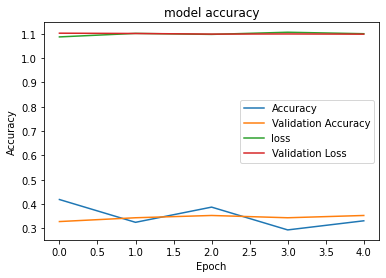

In [21]:
import matplotlib.pyplot as plt
print(hist.history)
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "loss", "Validation Loss"])
plt.show()

In [ ]:
model.save("vgg16")

In [ ]:
from keras.preprocessing import image
import tensorflow as tf
img = image.load_img("image_copy/carrot/carrot_1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
loaded_model = tf.keras.models.load_model('vgg16')

In [ ]:
img = image.load_img("image_copy/cabbage/cabbage_1.jpg",target_size=(224,224))
img = np.asarray(img)

img = np.expand_dims(img, axis=0)
output = loaded_model.predict(img)
output

In [ ]:
output = loaded_model.predict(img)
if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("cabbage")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print("onion")    
else:
    print('carrot')
output


In [ ]:
img = image.load_img("image_copy/carrot/carrot_1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = loaded_model.predict(img)
img1 = img
if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("cabbage")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print("onion")    
else:
    print('carrot')
output

In [ ]:
img = image.load_img("image_copy/onion/onion_1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = loaded_model.predict(img)
img2 = img
if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("cabbage")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print("onion")    
else:
    print('carrot')
output
